# Bank Marketing Data
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Link to the dataset:<br>
https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
# Import common libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

## 1. Read the file and summary statistics

In [2]:
data = pd.read_csv("./bank-additional/bank-additional-full.csv", delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# To get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()
# we can get mean, min , max, std and the three Quartiles

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning
## Checking for Missing values

In [5]:
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"'{column}': {unique_values}")

'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
'marital': ['married' 'single' 'divorced' 'unknown']
'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
'default': ['no' 'unknown' 'yes']
'housing': ['no' 'yes' 'unknown']
'loan': ['no' 'yes' 'unknown']
'contact': ['telephone' 'cellular']
'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
'duration': [ 261  149  226 ... 1246 1556 1868]
'campaign': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29

In [7]:
data_missing = (data == "unknown") | (data == 999) | (data == "nonexistent") 
missing_counts = data_missing.sum(axis=0)
print("Missing data counts in the dataset:\n", missing_counts)

Missing data counts in the dataset:
 age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


#### Observation:
Columns `default` and `pdays` and `poutcome` have a large number of missing value! <br>
### Do we need them in the analysis? 

Since `999` is used ad placeholder for `not previously contacted` it might be more informative later so we can store them into seperatw category, and replace the original column with median or mode of non-999 values.

In thd column `duration`the value `999`is an actual value and we don't need to handle it.

In [8]:
data_handled_missing = data.copy()
# Impute with mode for categorical data:
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan']
categorical_imputer = SimpleImputer(missing_values= "unknown" , strategy='most_frequent', copy=False)
data_handled_missing[categorical_cols] = categorical_imputer.fit_transform(data_handled_missing[categorical_cols])

# Handle 'pdays' with 999 as a separate indicator and impute non-999 values with median
data['pdays_missing'] = (data_handled_missing['pdays'] == 999).astype(int)
# impute the pdays column with median 
numerical_imputer = SimpleImputer(missing_values= 999, strategy='median', copy=False)
data_handled_missing['pdays'] = numerical_imputer.fit_transform(data_handled_missing[['pdays']]) 


# we impute it with mode, this can lead to bias data
numerical_imputer = SimpleImputer(missing_values= "nonexistent", strategy='most_frequent', copy=False)
data_handled_missing['poutcome'] = numerical_imputer.fit_transform(data_handled_missing[['poutcome']]).ravel()



# To handle missing values for column "default"

# 1. Drop the rows with "unknown" value
#data_row_default = data_handled_missing[data_handled_missing['default'] != "unknown"]

# 2. Drop the default column Entirely
#data_drop_default = data.drop(columns=['default']) 

# 3. impute with mode
default_imputer = SimpleImputer(missing_values= "unknown", strategy='most_frequent', copy=False)
data_handled_missing['default'] = default_imputer.fit_transform(data_handled_missing[['default']]).ravel()




In [9]:
data_handled_missing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6.0,0,failure,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.0,0,failure,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6.0,0,failure,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6.0,0,failure,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,6.0,0,failure,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,6.0,0,failure,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,6.0,0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,6.0,0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,6.0,0,failure,-1.1,94.767,-50.8,1.028,4963.6,yes


## 2. Data Transformation:
### One-hot encoding

In [10]:
def one_hot_encoding(df):
    df_onehot = pd.get_dummies(df, drop_first=True) # "to convert df to a one-hot-encoded form."
    return df_onehot

In [33]:
X = data_handled_missing.drop(["y"], axis=1)
X_onehot = one_hot_encoding(X)
X_onehot.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,0,1,6,1,149,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,226,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,307,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0


### using Label encoder
we would like to encode the categorical data like `job` with categories `admin`, `technician`, `manager`to `0`,`1`, `2`

In [12]:
# Using label Encoder:

label_encoders = {}
binary_cols = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome', 'y']

for col in binary_cols:
    le = LabelEncoder()
    data_handled_missing[col] = le.fit_transform(data_handled_missing[col])
    # To chek the encoded values.
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in label_encoders.items():
    print(f"Mapping for {col}: {mapping}")


Mapping for job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10}
Mapping for marital: {'divorced': 0, 'married': 1, 'single': 2}
Mapping for education: {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6}
Mapping for default: {'no': 0, 'yes': 1}
Mapping for housing: {'no': 0, 'yes': 1}
Mapping for loan: {'no': 0, 'yes': 1}
Mapping for contact: {'cellular': 0, 'telephone': 1}
Mapping for month: {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Mapping for day_of_week: {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Mapping for poutcome: {'failure': 0, 'success': 1}
Mapping for y: {'no': 0, 'yes': 1}


In [13]:
data_handled_missing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,6.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# Exploratory Data Analysis (EDA):
Discover patterns, spot anomalies, check assumptions with the help of summary statistics, graphical representations.

Two types EDA:

* Univariate: data being analyzed consists of just one variable. Histograms, Barplots, Boxplots (can be used for outliers) etc

* Multivariate : investigate the relationship between two or more variables of the data through cross-tabulation or statistics. Grouped bar plots, scatterplots, heatmaps for correlation etc

In [14]:
data_handled_missing["y"].value_counts() # to check our labeled feature 

y
0    36548
1     4640
Name: count, dtype: int64

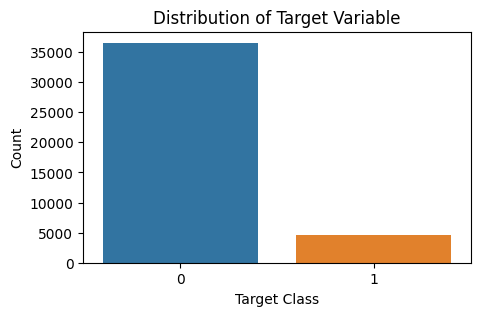

In [15]:
# Bar Chart
plt.figure(figsize=(5, 3))
sns.countplot(x='y', data=data_handled_missing)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [16]:
# Calculate imbalance ratio
class_counts = data_handled_missing['y'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 7.876724137931035


* There are about 7.88 times more instances of class 0 than class 1. <br>
* The model will likely be biased toward predicting the majority class (Class 0)

### Resampling Technique for handling class imbalance:
#### Undersampling:
Randomly remove samples from majority class to match the size of the minority class.

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data_handled_missing[data_handled_missing['y'] == 0] 
minority = data_handled_missing[data_handled_missing['y'] == 1]

# Undersample majority class
majority_undersampled = resample(majority,
    replace=False,  # Sample without replacement
    n_samples=len(minority),  # Match number of minority class
    random_state=123)  # For reproducibility

# The dataset after undersampling.
data_balanced = pd.concat([majority_undersampled, minority]) # we combine the minority and the undersampled Majority data.

In [18]:
data_balanced["y"].value_counts()

y
0    4640
1    4640
Name: count, dtype: int64

In [19]:
data_balanced.shape

(9280, 21)

### Check for Outliers with boxplots:
Outliers can either be a mistake or just varience.<br>


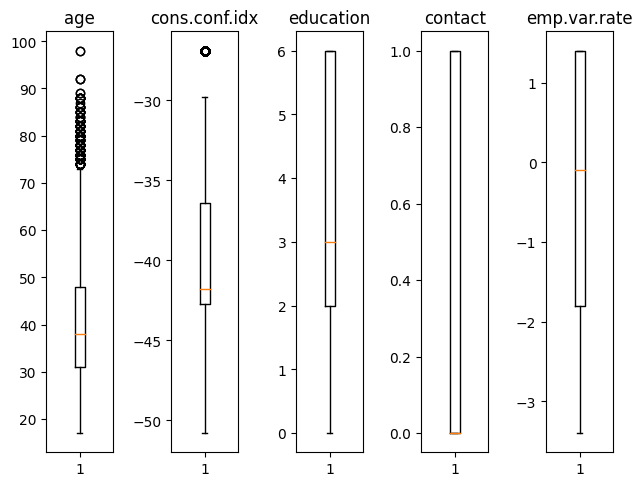

In [20]:
fig, ax = plt.subplots(1, 5)

plt.tight_layout()
ax[0].boxplot(data_balanced['age'])
ax[0].set_title("age")

ax[1].set_title('cons.conf.idx')
ax[1].boxplot(data_balanced["cons.conf.idx"])

ax[2].set_title('education')
ax[2].boxplot(data_balanced["education"])

ax[3].set_title('contact')
ax[3].boxplot(data_balanced["contact"])

ax[4].set_title('emp.var.rate')
ax[4].boxplot(data_balanced["emp.var.rate"])

plt.show()

### Grouped bar-plot:

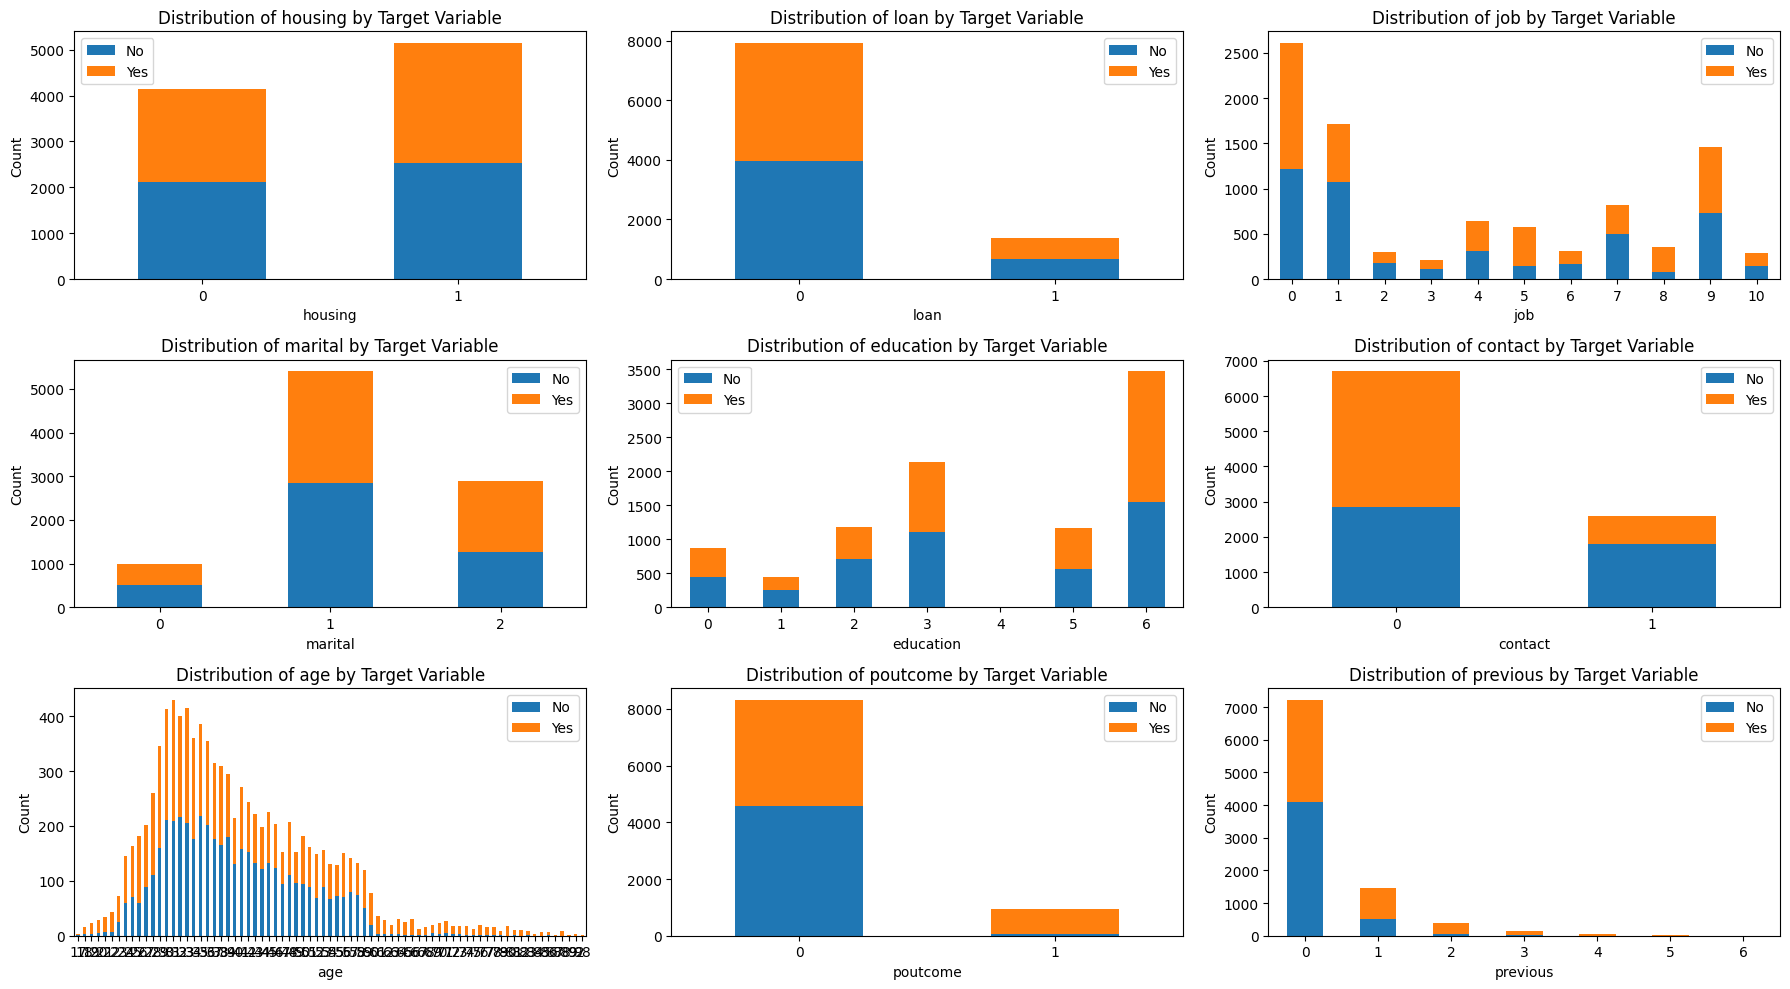

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  
axes = axes.flatten()  

attributes = ['housing', 'loan', 'job', 'marital', 'education', 'contact', 'age', 'poutcome', 'previous']
ylabels = ['No', 'Yes']

for i, attr in enumerate(attributes):
    # Grouping and counting values
    counts = data_balanced.groupby(attr)['y'].value_counts().unstack()
    # Create a stacked bar plot for each attribute
    counts.plot(kind='bar', stacked=True, ax=axes[i])

    axes[i].set_title(f'Distribution of {attr} by Target Variable')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(attr)
    axes[i].legend(labels=ylabels)
    axes[i].set_xticklabels(counts.index, rotation=0)

plt.tight_layout()
plt.show()

### Highly correlated features and Heatmap:
A strong correlation is indicated by a Pearson Correlation Coefficient value near 1. 
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

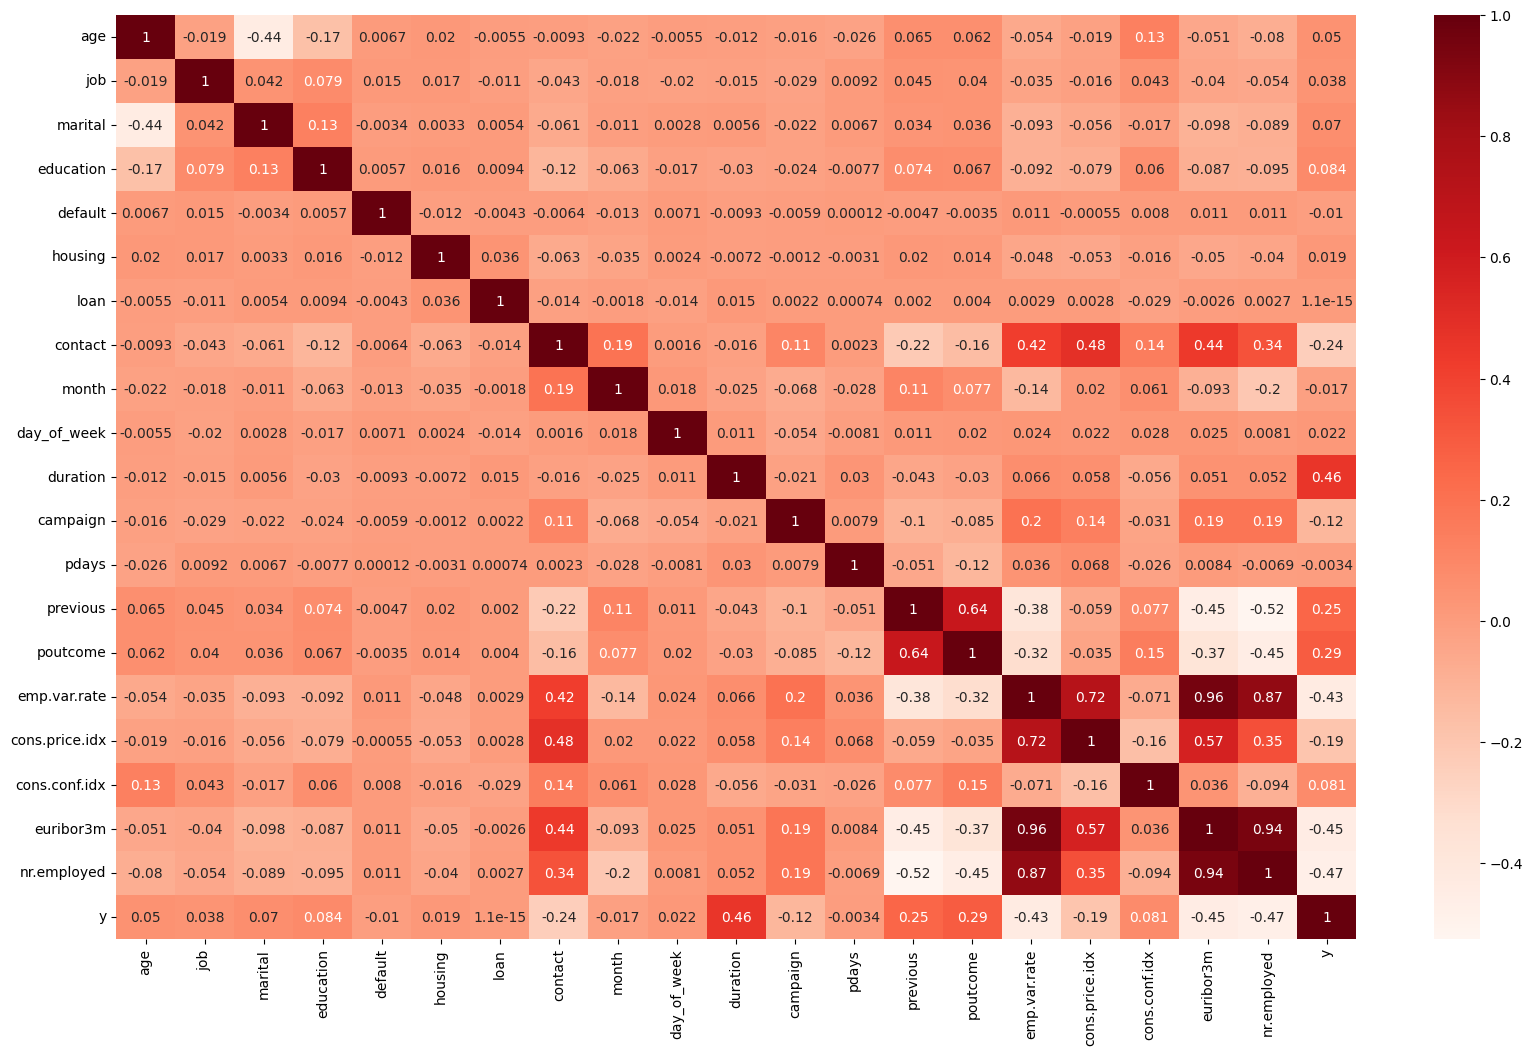

In [22]:
plt.figure(figsize=(20,12))

cor = data_balanced.corr()

sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds);

plt.show()

# 3. Data Reduction
### Standardization:
Standardization transforms data to have a mean of zero and a standard deviation of 1.<br>
It is a crucial step before performing PCA, since we are interested in the components that maximize the variance.


In [23]:
data_balanced.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35917,33,10,1,3,0,1,1,0,6,1,...,1,6.0,0,0,-1.8,92.893,-46.2,1.264,5099.1,0
14496,51,5,1,2,0,1,0,0,3,3,...,2,6.0,0,0,1.4,93.918,-42.7,4.961,5228.1,0
19892,31,9,1,5,0,0,0,0,1,0,...,2,6.0,0,0,1.4,93.444,-36.1,4.966,5228.1,0
2923,34,0,2,3,0,0,0,1,6,4,...,4,6.0,0,0,1.1,93.994,-36.4,4.859,5191.0,0
20337,38,0,1,6,0,0,0,0,1,3,...,1,6.0,0,0,1.4,93.444,-36.1,4.966,5228.1,0


In [24]:
from sklearn.preprocessing import StandardScaler

columns = data_balanced.columns
columns =columns[:-1]      # we dont want attribute 'y'
scaler = StandardScaler() # have mean of 0 and std of 1
x = scaler.fit_transform(data_balanced[columns]) 
data_standardized = pd.DataFrame(x, columns=columns)


In [25]:
print(type(x))
print(type(data_standardized))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
data_standardized.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.611822,1.739858,-0.331621,-0.418801,-0.010381,0.897076,2.406981,-0.621044,0.706181,-0.739778,-0.773931,-0.563945,0.01129,-0.452293,-0.339288,-0.759327,-0.921734,-1.118612,-0.902220,-0.421451
1,0.892805,0.347419,-0.331621,-0.902013,-0.010381,0.897076,-0.415458,-0.621044,-0.494068,0.687931,-0.773931,-0.143591,0.01129,-0.452293,-0.339288,1.103624,0.694461,-0.463879,1.056503,1.062360
2,-0.779003,1.461370,-0.331621,0.547623,-0.010381,-1.114733,-0.415458,-0.621044,-1.294235,-1.453633,-0.901552,-0.143591,0.01129,-0.452293,-0.339288,1.103624,-0.052931,0.770761,1.059152,1.062360
3,-0.528232,-1.045019,1.297518,-0.418801,-0.010381,-1.114733,-0.415458,1.610193,0.706181,1.401786,-0.782254,0.697117,0.01129,-0.452293,-0.339288,0.928972,0.814296,0.714641,1.002462,0.635621
4,-0.193870,-1.045019,-0.331621,1.030835,-0.010381,-1.114733,-0.415458,-0.621044,-1.294235,0.687931,-0.649084,-0.563945,0.01129,-0.452293,-0.339288,1.103624,-0.052931,0.770761,1.059152,1.062360


# Principal Component Analysis (PCA)
Overall PCA attemps to find out what features explain the most variance in your data. <br>
PCA transforms a large set of correlated variables into a smaller set of uncorrelated variables, called principal components

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # reduce the dimensionality of the standardized dataset in 2 Principal Components,
data_pca = pca.fit_transform(data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_  # the explained variance ratio
df_principal_components = pd.DataFrame(pca.components_, columns=columns) # To store the result of pca's attribute components


In [28]:
data_standardized.shape

(9280, 20)

In [29]:
data_pca.shape

(9280, 2)

In [30]:
df_principal_components

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.032147,0.036683,0.058803,0.074978,-0.004817,0.034735,0.000791,-0.266165,0.065290,-0.005803,-0.038289,-0.130722,-0.030386,0.295276,0.262390,-0.465432,-0.310955,0.049246,-0.468645,-0.448648
1,0.489718,-0.067035,-0.440371,-0.263638,0.001662,-0.056327,-0.031108,0.290377,0.254045,0.049815,-0.052334,0.004919,-0.094246,0.288024,0.320008,0.066960,0.251376,0.247945,0.046790,-0.091762


In [31]:
explained_variance_ratio # the first component explains 20% and the second 0.8% of the variance in the data

array([0.20376129, 0.08067444])

#### Heat map of the Principal Components.

<Axes: >

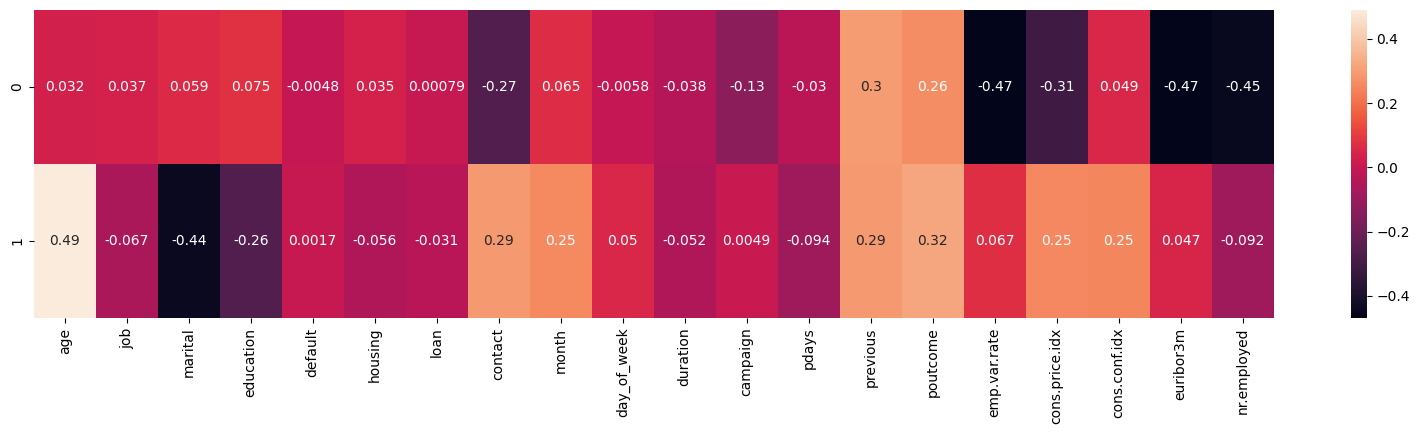

In [32]:
plt.figure(figsize=(20,4))
sns.heatmap(df_principal_components,annot=True)

The attribute `marital` has the highest absolute loading value (0.468602) in the first principal component, meaning it contributes the most to the variance of the first principal component.

# Thank you!